# **The universal approximation theorem**

**Disclaimer**: large parts of the lab are taken from [this webpage](https://towardsdatascience.com/understand-universal-approximation-theorem-with-code-774dcef55731).


Let us test the ability of standard single-hidden-layer feedforward Neural Network of finite number of hidden neurons of approximating continuous functions by means of an arbitrary activation function.

The theorem has its variants related to the numeber of layers for fixed number of neurons. Or, for fixed number of neurons and layers, one can choose a proper activation function (is it really feasible?)

We will focus on changing the structure of the problem in order to get a more "connected" Neural Network able to better capture the features of the data.

In [1]:
# Downloading dependencies:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
### Setting function to approximate ###

# y = x^2
x = np.linspace(-30,30,100)
y = x**2

Working on the universal approximation theorem means _changing_ the parameters and the structure of the net:
* number of neurons
* number of layers
* learning rate (very important!) and optimization process
* number of epochs (duration of the training process) 
* activation function (.... _really?_ ....)

In [3]:
# Net definition #

n_neurons = 10  # number of neurons/nodes
learning_rate = 5e-3 # learning rate

   
model = nn.Sequential(     
          nn.Linear(1, n_neurons),
          nn.ReLU(),
          # nn.Linear(n_neurons,n_neurons),
          # nn.ReLU(),        
          nn.Linear(n_neurons,1),
          nn.ReLU()
          )


# Set up  : Input (1 Node) -> Hidden (n_neurons nodes) -> Output (1 Node) 
# Set up 2: Input (1 Node) -> Hidden (n_neurons nodes) -> Hidden (n_neurons nodes) -> Output (1 Node)

# Important Note: If you increase the number of neurons or use a harder function to approximate, try tuning the learning rate.
#                 Tuning the learning rate is vital to properly train the network.

optimizer = optim.RMSprop(model.parameters(), lr=learning_rate) # define optimizer
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)

criterion = nn.MSELoss() # define loss function


Let us train the net!

In [6]:
# Training #

# Convert to tensor form with batch for PyTorch model.
inputs = torch.tensor(x).view(-1,1)
labels = torch.tensor(y).view(-1,1)

# Important Note 2: Change epochs
epochs = 20000

for epoch in range(epochs):  # loop over the data multiple times
   
    # zero the parameter gradients
    optimizer.zero_grad()
   
    # forward + backward + optimize
    outputs = model(inputs.float())
    loss = criterion(outputs, labels.float())
    loss.backward()
    optimizer.step()

Let us test the model! 

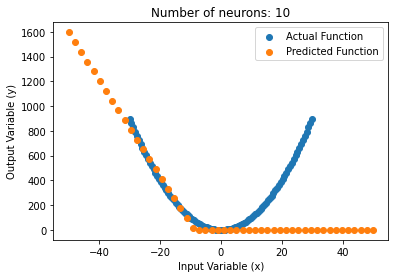

In [7]:
### Running Inference over the trained model ***********  #
x_test = np.linspace(-50,50,50)

with torch.no_grad():
    test_inputs = torch.tensor(x_test).view(len(x_test),-1).float()
    y_hat = model(test_inputs)
    y_hat = y_hat.detach().numpy()
    
# ******************************************************  #

### Plot results: Actual vs Model Prediction ***********  #
plt.scatter(x,y,label='Actual Function')
plt.scatter(x_test,y_hat,label="Predicted Function")
plt.title(f'Number of neurons: {n_neurons}')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()
# ******************************************************  #

Try other functions and configurations!

**Enjoy!**